##**Thông tin**


1.   Họ tên: Trần Huỳnh Kỳ Anh
2.   MSSV: 19521216
3.   Ngày thực hiện: 19/10/2021
4.   Nội dung: 



#**Bước 1: bảng dữ liệu Socical_Network_Ads.csv**

In [1]:
!git clone https://github.com/tranhuynhkyanh/CS116

Cloning into 'CS116'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [2]:
import pandas as pd
import numpy as np


In [3]:
ads_data = pd.read_csv("/content/CS116/Social_Network_Ads.csv")

In [4]:
ads_data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:

x_data = ads_data[['Age','EstimatedSalary']]
y_data = ads_data.iloc[:,-1]

In [6]:
x_data

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [7]:
y_data

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

#**Bước 2: Scale các feature**

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
x_data_scaled = scaler.fit_transform(x_data)
x_data_scaled


array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

#**Bước 3: Chia tập train, test**


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data_scaled, y_data, test_size=0.2)

#**Bước 4: Train bằng model**

In [10]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,y_train)
neigh_score = neigh.score(X_test,y_test)
neigh_score

0.9125

In [11]:
#SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
svm_score = svm.score(X_test,y_test)
svm_score

0.8875

In [12]:
#Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf_score = clf.score(X_test,y_test)
clf_score

0.8375

In [13]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_score = gnb.score(X_test,y_test)
gnb_score

0.9

In [14]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_rd=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rd.fit(X_train,y_train)

clf_rd_score = clf_rd.score(X_test,y_test)
clf_rd_score

0.875

In [15]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train,y_train)
lgr_score = lgr.score(X_test,y_test)
lgr_score

0.8375

#**Bước 5: Tính accuracy với KFold K=5**

In [16]:
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score

In [17]:
def kfold(model):
  # Triển khai KFold
  kf = KFold(n_splits=5, random_state=None) 
  model = model
  acc_score = []

  for train_index , test_index in kf.split(x_data_scaled):
      X_train , X_test = x_data_scaled[train_index,:],x_data_scaled[test_index,:]
      y_train , y_test = y_data[train_index] , y_data[test_index]
      
      model.fit(X_train,y_train)
      pred_values = model.predict(X_test)
      
      acc = accuracy_score(pred_values , y_test)
      acc_score.append(acc)
  avg_acc_score = sum(acc_score)/5
  print('Độ chính xác mỗi fold: {}'.format(acc_score))
  print('Độ chính xác trung bình : {}'.format(avg_acc_score))    
  return acc_score


In [18]:
#KNN
acc_score_knn = kfold(KNeighborsClassifier())


Độ chính xác mỗi fold: [0.95, 0.95, 0.825, 0.85, 0.9]
Độ chính xác trung bình : 0.8949999999999999


In [19]:
#SVM
acc_score_svm = kfold(SVC())

Độ chính xác mỗi fold: [0.95, 0.975, 0.825, 0.85, 0.9375]
Độ chính xác trung bình : 0.9075


In [20]:
#Decision Tree
acc_score_tree = kfold(tree.DecisionTreeClassifier())

Độ chính xác mỗi fold: [0.8875, 0.95, 0.825, 0.8, 0.8375]
Độ chính xác trung bình : 0.86


In [21]:
#Naive Bayes
acc_score_gnb = kfold(GaussianNB())

Độ chính xác mỗi fold: [0.9, 0.9375, 0.825, 0.825, 0.8]
Độ chính xác trung bình : 0.8574999999999999


In [22]:
#Random Forest
acc_score_rd = kfold(RandomForestClassifier(n_estimators=100))

Độ chính xác mỗi fold: [0.95, 0.9625, 0.8125, 0.8375, 0.9]
Độ chính xác trung bình : 0.8925000000000001


In [23]:
#Logistic Regression
acc_score_lgr = kfold(LogisticRegression())

Độ chính xác mỗi fold: [0.7875, 0.9125, 0.825, 0.8375, 0.75]
Độ chính xác trung bình : 0.8225


#**Bước 6: Lập bảng so sánh**

In [26]:
import pandas as pd
df = pd.DataFrame([acc_score_knn,acc_score_gnb,acc_score_lgr,acc_score_rd,acc_score_svm,acc_score_tree])
df.rename(columns={0: 'KNN', 1: 'Naive Bayes', 2: 'Logistic Regression', 3: 'Random Forest',4:'SVM',5:'Decision Tree'}, inplace=True)

In [27]:
df

,KNN,Naive Bayes,Logistic Regression,Random Forest,SVM
0,0.9500,0.9500,0.8250,0.8500,0.9000
1,0.9000,0.9375,0.8250,0.8250,0.8000
2,0.7875,0.9125,0.8250,0.8375,0.7500
3,0.9500,0.9625,0.8125,0.8375,0.9000
4,0.9500,0.9750,0.8250,0.8500,0.9375
5,0.8875,0.9500,0.8250,0.8000,0.8375


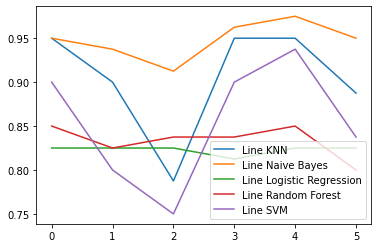

In [29]:
import matplotlib.pyplot as plt

for col in df.columns:
        plt.plot( df[col], label='Line '+col)

plt.legend()
plt.show()